In [28]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [29]:
# Download stock data
data = yf.download('RELIANCE.NS', start='2021-01-01', end='2024-10-20')
data = data.ffill()  # Forward fill to handle missing values



[*********************100%***********************]  1 of 1 completed


In [30]:
# Remove outliers
Q1 = data['Close'].quantile(0.25)
Q3 = data['Close'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['Close'] < (Q1 - 1.5 * IQR)) | (data['Close'] > (Q3 + 1.5 * IQR)))]

In [31]:
# Calculate daily returns and other features
data['Daily Return'] = data['Close'].pct_change()
data['5_day_MA'] = data['Close'].rolling(window=5).mean()
data['10_day_MA'] = data['Close'].rolling(window=10).mean()
data['20_day_MA'] = data['Close'].rolling(window=20).mean()
data['50_day_MA'] = data['Close'].rolling(window=50).mean()
data['5_day_std'] = data['Close'].rolling(window=5).std()
data['10_day_std'] = data['Close'].rolling(window=10).std()
data['20_day_std'] = data['Close'].rolling(window=20).std()



In [32]:
# Create target variable
data['Target'] = (data['Close'].shift(-1) > data['Close']).astype(int)

data.dropna(inplace=True)



In [33]:
# Prepare features and target
features = ['5_day_MA', '10_day_MA', '20_day_MA', '50_day_MA', 
            '5_day_std', '10_day_std', '20_day_std', 'Daily Return']
X = data[features]
y = data['Target']



In [34]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [46]:
# Make predictions
y_pred = rf_model.predict(X_test)



In [47]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')



Accuracy: 0.47701149425287354


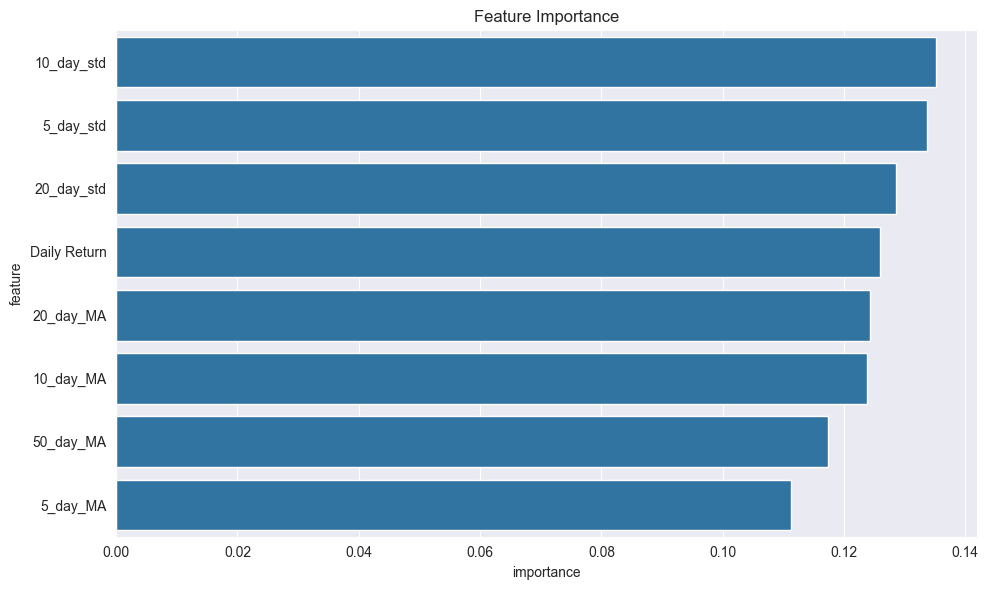

In [49]:
# Use the 'inline' Matplotlib backend for Jupyter
%matplotlib inline

# Assuming 'rf_model' and 'features' are already defined as before
# Plot Feature Importance
feature_importance = pd.DataFrame({'feature': features, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

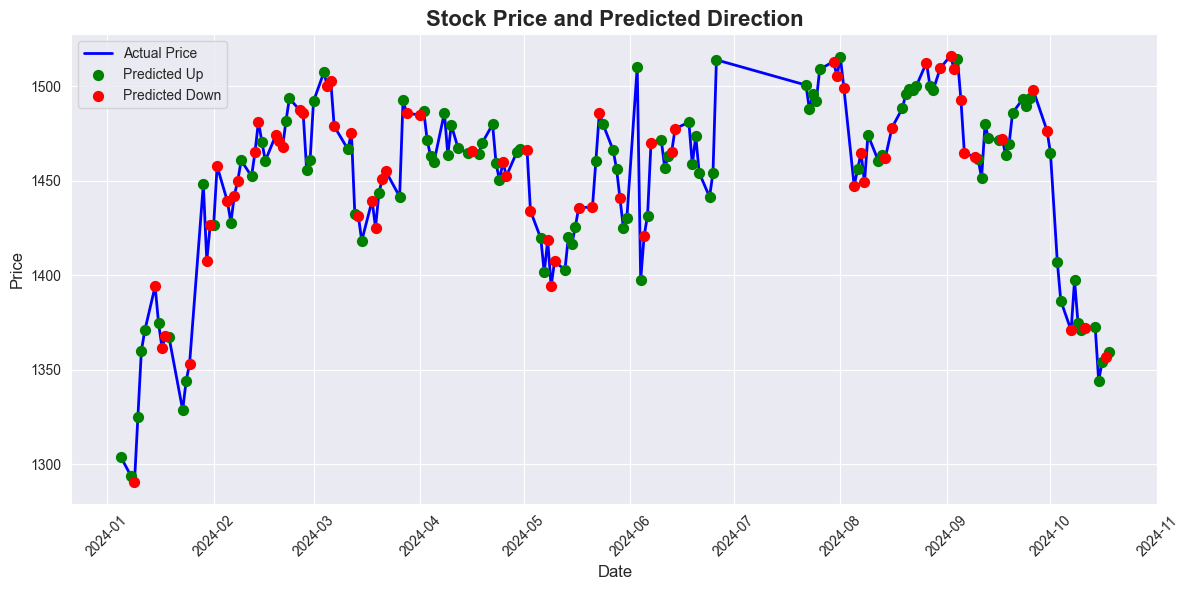

In [56]:
# Plot Stock Price Predictions
plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")
plt.plot(data.index[-len(y_test):], data['Close'].iloc[-len(y_test):], label='Actual Price', color='blue', linewidth=2)
# Plot predictions
up_pred = data.index[-len(y_test):][y_pred == 1]
down_pred = data.index[-len(y_test):][y_pred == 0]
plt.scatter(up_pred, data['Close'].loc[up_pred], color='green', label='Predicted Up', s=50, zorder=5)
plt.scatter(down_pred, data['Close'].loc[down_pred], color='red', label='Predicted Down', s=50, zorder=5)

plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Stock Price and Predicted Direction', fontsize=16, fontweight='bold')
plt.legend(fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


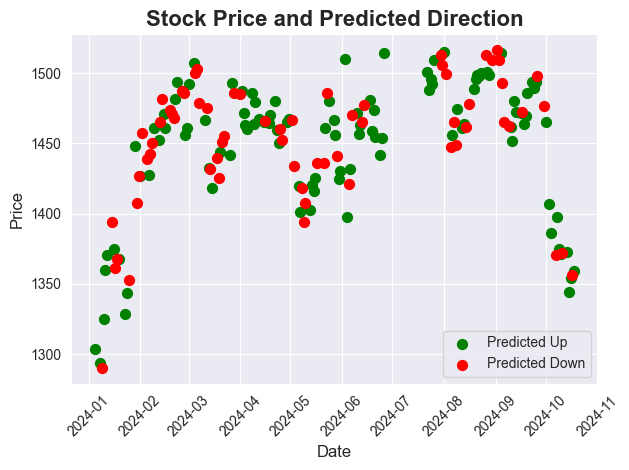